In [1]:
import numpy as np 
import pandas as pd
import cv2
import PIL
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
import glob


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dicom_data = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')
image_dir = '/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [3]:
dicom_data.shape

(10237, 38)

In [4]:
dicom_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [5]:
dicom_data.tail()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
10232,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.62798...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.627982...,NaN,8,8,BREAST,3744,20160503,134238.422,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.627982547125586065005...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.310901637111684385906...,91038.0
10233,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.82451...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.824512...,NaN,16,16,BREAST,3316,20160426,123905.617,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.824512568105677732346...,1,0,ISO_IR 100,20161004.0,DDSM,1.3.6.1.4.1.9590.100.1.2.246896536912401556922...,132704.0
10234,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24759...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.247594...,NaN,16,16,BREAST,2712,20160426,134551.632,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.247594800112988856209...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.150339554012064216510...,191922.0
10235,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.28513...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.285138...,NaN,8,8,BREAST,2736,20160426,110906.969,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.285138900913160236325...,1,0,ISO_IR 100,20160721.0,DDSM,1.3.6.1.4.1.9590.100.1.2.426769868613284096628...,83526.0
10236,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.28513...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.285138...,NaN,16,16,BREAST,686,20160426,110906.969,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.285138900913160236325...,1,16032,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.426769868613284096628...,214732.0


In [6]:
dicom_data.sample(5)

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
1289,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.37305...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.373056...,NaN,16,16,BREAST,641,20160503,134749.198,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.373056562313587683031...,1,0,ISO_IR 100,20170830.0,DDSM,1.3.6.1.4.1.9590.100.1.2.373610122112389698803...,215534.0
5531,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.53170...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.531700...,NaN,16,16,BREAST,432,20160426,134915.342,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.531700571107042063167...,1,34992,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.210501436012661181930...,215021.0
9768,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12706...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.127062...,NaN,16,16,BREAST,2592,20160503,112522.793,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.127062399511053285431...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.257914556513241710026...,162107.0
5976,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24749...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.247496...,NaN,8,8,BREAST,4531,20160503,135128.320,WSD,...,MATLAB,ROI mask images,1.3.6.1.4.1.9590.100.1.2.247496661611894958115...,1,0,ISO_IR 100,20170906.0,DDSM,1.3.6.1.4.1.9590.100.1.2.275544782112903992412...,91258.0
6334,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.33879...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.338795...,NaN,16,16,BREAST,3766,20160426,115847.261,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.338795836012549040207...,1,0,ISO_IR 100,20161004.0,DDSM,1.3.6.1.4.1.9590.100.1.2.299756943812133215705...,132430.0


In [7]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [8]:
dicom_data.SeriesDescription.unique()

array(['cropped images', 'full mammogram images', nan, 'ROI mask images'],
      dtype=object)

<Axes: xlabel='SeriesDescription', ylabel='count'>

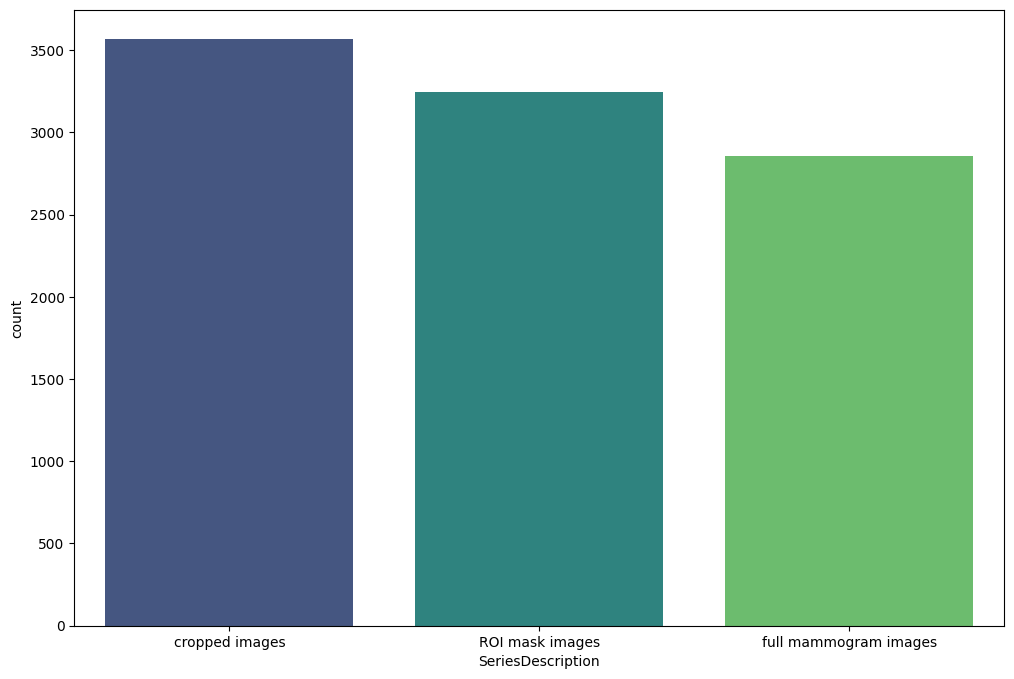

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(x=dicom_data.SeriesDescription.value_counts(dropna=False).index, y=dicom_data.SeriesDescription.value_counts(dropna=False), palette='viridis')


In [10]:
cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [11]:
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images.head()

0     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
3     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
6     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
7     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
10    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
Name: image_path, dtype: object

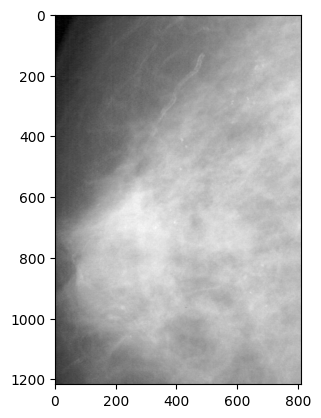

In [12]:
for file  in cropped_images[0:5]:
  cropped_images_show = PIL.Image.open(file)
  gray_img= cropped_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

In [13]:
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [14]:
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.head()

1     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
2     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
11    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
12    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
15    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
Name: image_path, dtype: object

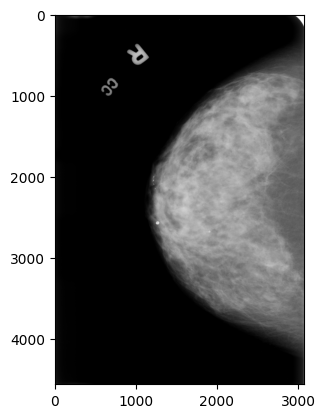

In [15]:
for file  in full_mammogram_images[0:5]:
  full_mammogram_images_show = PIL.Image.open(file)
  gray_img= full_mammogram_images_show.convert("L")
  plt.imshow(gray_img, cmap='gray')

In [16]:
ROI_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [17]:
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

5     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
8     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
9     /kaggle/input/cbis-ddsm-breast-cancer-image-da...
14    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
20    /kaggle/input/cbis-ddsm-breast-cancer-image-da...
Name: image_path, dtype: object

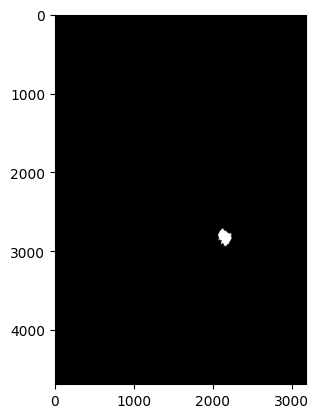

In [18]:
for file  in ROI_mask_images[0:10]:
    ROI_mask_images_show = PIL.Image.open(file)
    gray_img= ROI_mask_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [19]:
calc_case_df = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_train_set.csv')

In [20]:
calc_case_df.head(5)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...,Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...


In [21]:
calc_case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [22]:
calc_case_df.describe()

,breast density,abnormality id,assessment,subtlety
count,1546.000000,1546.000000,1546.000000,1546.000000
mean,2.663648,1.415265,3.258732,3.411384
std,0.937219,0.903571,1.229231,1.179754
min,1.000000,1.000000,0.000000,1.000000
25%,2.000000,1.000000,2.000000,3.000000
50%,3.000000,1.000000,4.000000,3.000000
75%,3.000000,1.000000,4.000000,4.000000
max,4.000000,7.000000,5.000000,5.000000


In [23]:
mass_case_df = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')

In [24]:
mass_case_df.head(5)

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...,Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...,Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....,Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....


In [25]:
mass_case_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [26]:
mass_case_df.describe()

,breast_density,abnormality id,assessment,subtlety
count,1318.000000,1318.000000,1318.000000,1318.000000
mean,2.203338,1.116085,3.504552,3.965857
std,0.873774,0.467013,1.414609,1.102032
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,3.000000,3.000000
50%,2.000000,1.000000,4.000000,4.000000
75%,3.000000,1.000000,4.000000,5.000000
max,4.000000,6.000000,5.000000,5.000000


# **Data Cleaning**

In [27]:
dicom_cleaned_data = dicom_data.copy()
dicom_cleaned_data.head()

,file_path,image_path,AccessionNumber,BitsAllocated,BitsStored,BodyPartExamined,Columns,ContentDate,ContentTime,ConversionType,...,SecondaryCaptureDeviceManufacturerModelName,SeriesDescription,SeriesInstanceUID,SeriesNumber,SmallestImagePixelValue,SpecificCharacterSet,StudyDate,StudyID,StudyInstanceUID,StudyTime
0,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...,NaN,16,16,BREAST,351,20160426,131732.685,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.129308726812851964007...,1,23078,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.271867287611061855725...,214951.0
1,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...,NaN,16,16,BREAST,3526,20160426,143829.101,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.248386742010678582309...,1,0,ISO_IR 100,20160720.0,DDSM,1.3.6.1.4.1.9590.100.1.2.161516517311681906612...,193426.0
2,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...,NaN,16,16,BREAST,1546,20160503,111956.298,WSD,...,MATLAB,full mammogram images,1.3.6.1.4.1.9590.100.1.2.267213171011171858918...,1,0,ISO_IR 100,20160807.0,DDSM,1.3.6.1.4.1.9590.100.1.2.291043622711253836701...,161814.0
3,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,16,16,BREAST,97,20160503,115347.770,WSD,...,MATLAB,cropped images,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,32298,ISO_IR 100,20170829.0,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,180109.0
4,CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...,CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...,NaN,8,8,Left Breast,3104,20160503,115347.770,WSD,...,MATLAB,NaN,1.3.6.1.4.1.9590.100.1.2.381187369611524586537...,1,0,ISO_IR 100,NaN,DDSM,1.3.6.1.4.1.9590.100.1.2.335006093711888937440...,NaN


In [28]:
# 'dicom_cleaned_data' DataFrame'inin sütunlarını yazdırarak mevcut sütunları kontrol ediyoruz
print(dicom_cleaned_data.columns)

Index(['file_path', 'image_path', 'AccessionNumber', 'BitsAllocated',
       'BitsStored', 'BodyPartExamined', 'Columns', 'ContentDate',
       'ContentTime', 'ConversionType', 'HighBit', 'InstanceNumber',
       'LargestImagePixelValue', 'Laterality', 'Modality', 'PatientBirthDate',
       'PatientID', 'PatientName', 'PatientOrientation', 'PatientSex',
       'PhotometricInterpretation', 'PixelRepresentation',
       'ReferringPhysicianName', 'Rows', 'SOPClassUID', 'SOPInstanceUID',
       'SamplesPerPixel', 'SecondaryCaptureDeviceManufacturer',
       'SecondaryCaptureDeviceManufacturerModelName', 'SeriesDescription',
       'SeriesInstanceUID', 'SeriesNumber', 'SmallestImagePixelValue',
       'SpecificCharacterSet', 'StudyDate', 'StudyID', 'StudyInstanceUID',
       'StudyTime'],
      dtype='object')


In [29]:
dicom_cleaned_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime',
                         'PatientSex','PatientBirthDate','ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                         'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'
                        ],axis =1, inplace=True) 

In [30]:
dicom_cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [31]:
dicom_cleaned_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

In [32]:
dicom_cleaned_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_cleaned_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_cleaned_data.isna().sum()

/tmp/ipykernel_25/2462094405.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_cleaned_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_25/2462094405.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_cleaned_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)


file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

In [33]:
Data_cleaning_1 = calc_case_df.copy()
# Aşağıdaki satırlarda isim değişikliği yapılmıştır.
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'calc_type'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'calc_distribution'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'image_view'}) 
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'breast_density'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})

# Belirtilen sütunlardaki veri tiplerini kategorik tipe dönüştürür.
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')

In [34]:
Data_cleaning_1.isna().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [35]:
Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_1.isna().sum()

/tmp/ipykernel_25/1617648140.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_25/1617648140.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)


patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [36]:
Data_cleaning_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1546 non-null   object  
 1   breast_density           1546 non-null   int64   
 2   left_or_right_breast     1546 non-null   category
 3   image_view               1546 non-null   category
 4   abnormality id           1546 non-null   int64   
 5   abnormality_type         1546 non-null   category
 6   calc_type                1546 non-null   category
 7   calc_distribution        1546 non-null   category
 8   assessment               1546 non-null   int64   
 9   pathology                1546 non-null   category
 10  subtlety                 1546 non-null   int64   
 11  image file path          1546 non-null   object  
 12  cropped image file path  1546 non-null   object  
 13  ROI mask file path       1546 non-null   object  
dtypes: categ

In [37]:
Data_cleaning_2 = mass_case_df.copy()
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})


Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')

Data_cleaning_2.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [38]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2.isna().sum()

/tmp/ipykernel_25/904955154.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_25/904955154.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)


patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [39]:
Data_cleaning_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1318 non-null   object  
 1   breast_density           1318 non-null   int64   
 2   left_or_right_breast     1318 non-null   category
 3   image_view               1318 non-null   category
 4   abnormality id           1318 non-null   int64   
 5   abnormality_type         1318 non-null   category
 6   mass_shape               1318 non-null   category
 7   mass_margins             1318 non-null   category
 8   assessment               1318 non-null   int64   
 9   pathology                1318 non-null   category
 10  subtlety                 1318 non-null   int64   
 11  image file path          1318 non-null   object  
 12  cropped image file path  1318 non-null   object  
 13  ROI mask file path       1318 non-null   object  
dtypes: categ

In [40]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# calc_case_description_test_set.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/calc_case_description_test_set.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'calc_case_description_test_set.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 326 rows and 14 columns


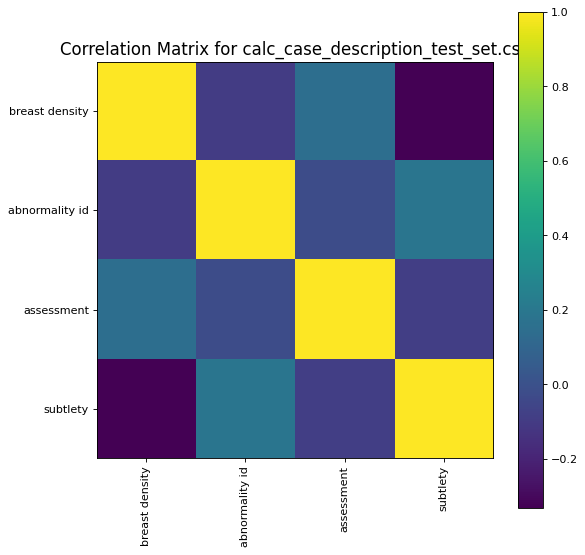

calc_case_description_test_csv


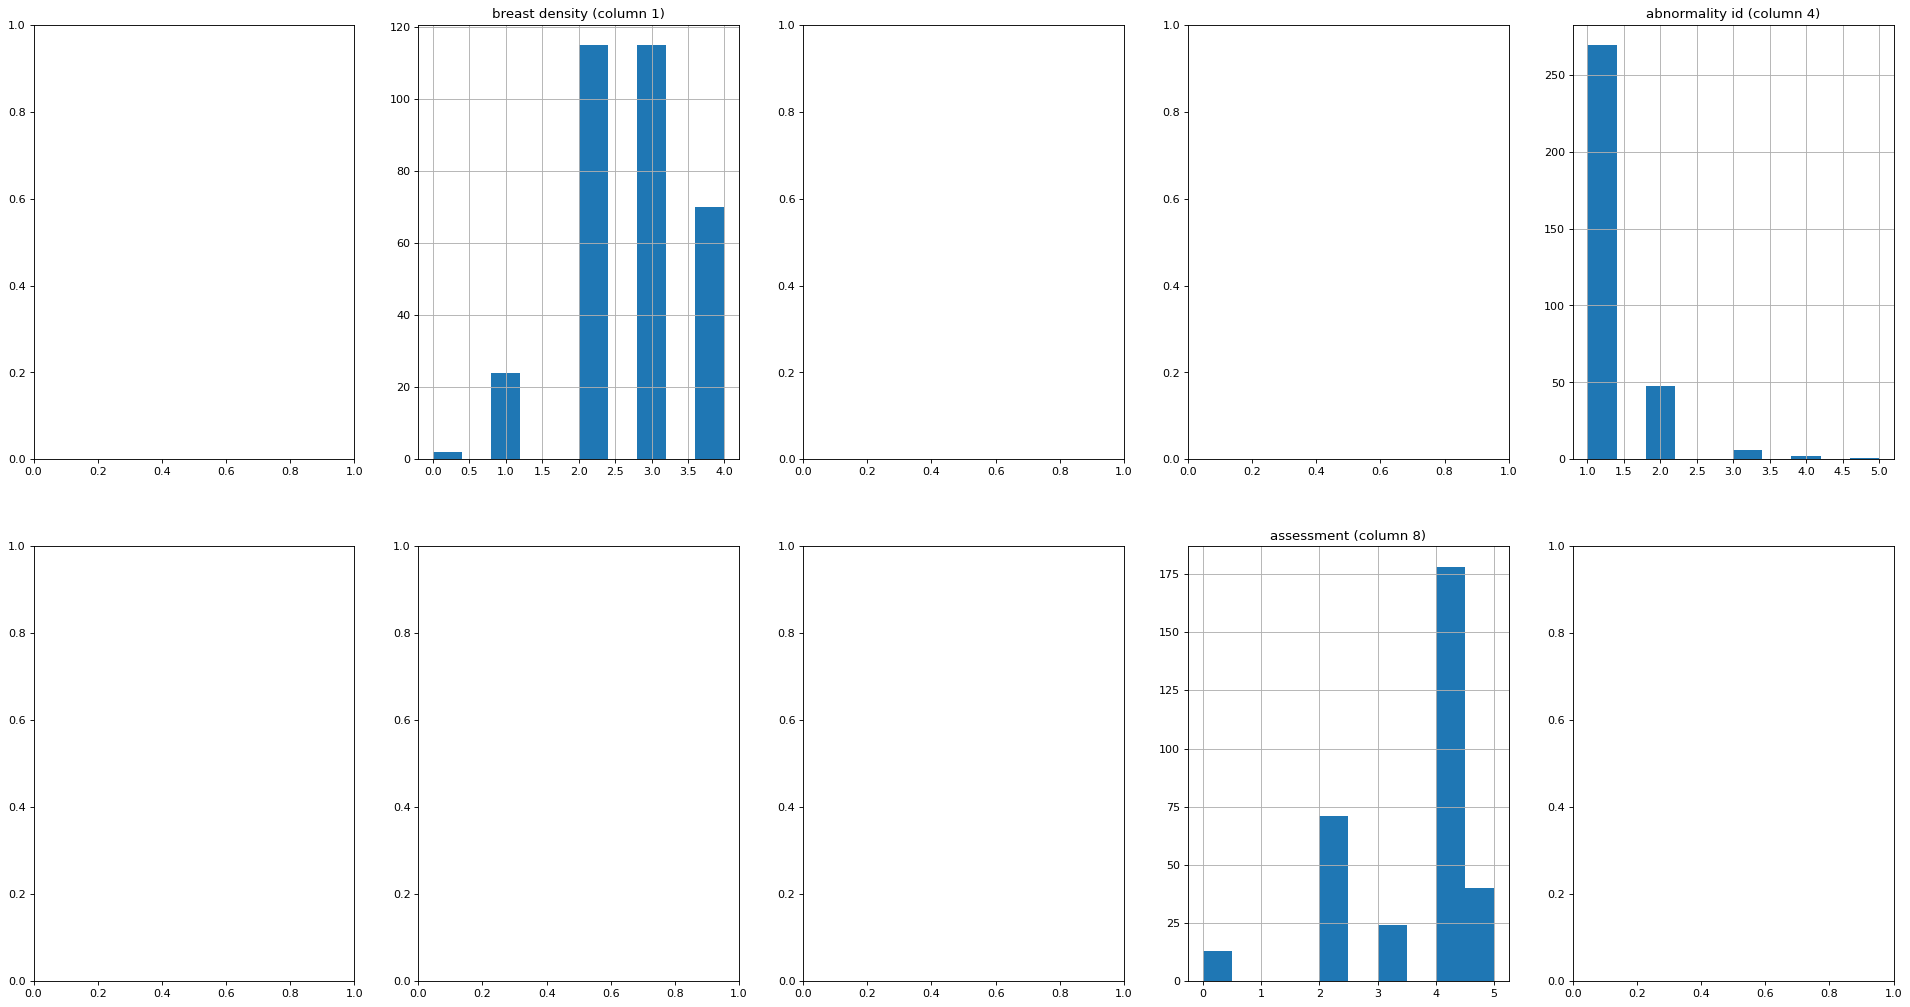

In [41]:
import matplotlib.pyplot as plt
import numpy as np  

def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    numeric_df = numeric_df.dropna(axis='columns')
    
    if numeric_df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({numeric_df.shape[1]}) is less than 2')
        return
    
    corr = numeric_df.corr()
    
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int(np.ceil(nCol / nGraphPerRow))
    
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            continue  # Sayısal olmayan sütunları atla
        columnDf.hist()
        plt.title(f'{columnNames[i]} (column {i})')
    
    plt.show()

plotCorrelationMatrix(df1, 8)
print("calc_case_description_test_csv")
plotPerColumnDistribution(df1, 10, 5)

There are 1000 rows and 14 columns


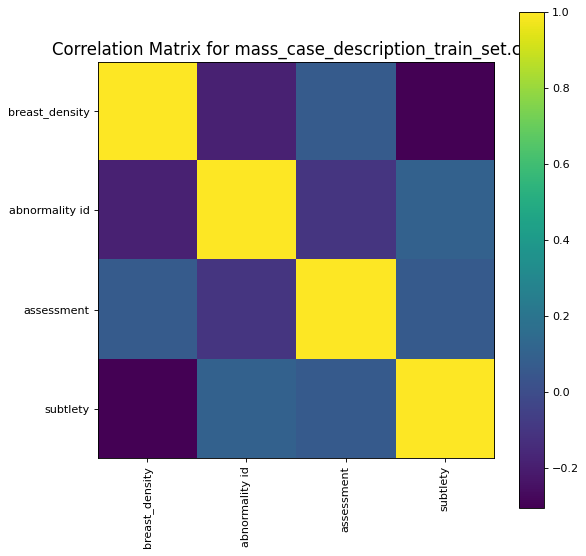

mass_case_description_train_csv


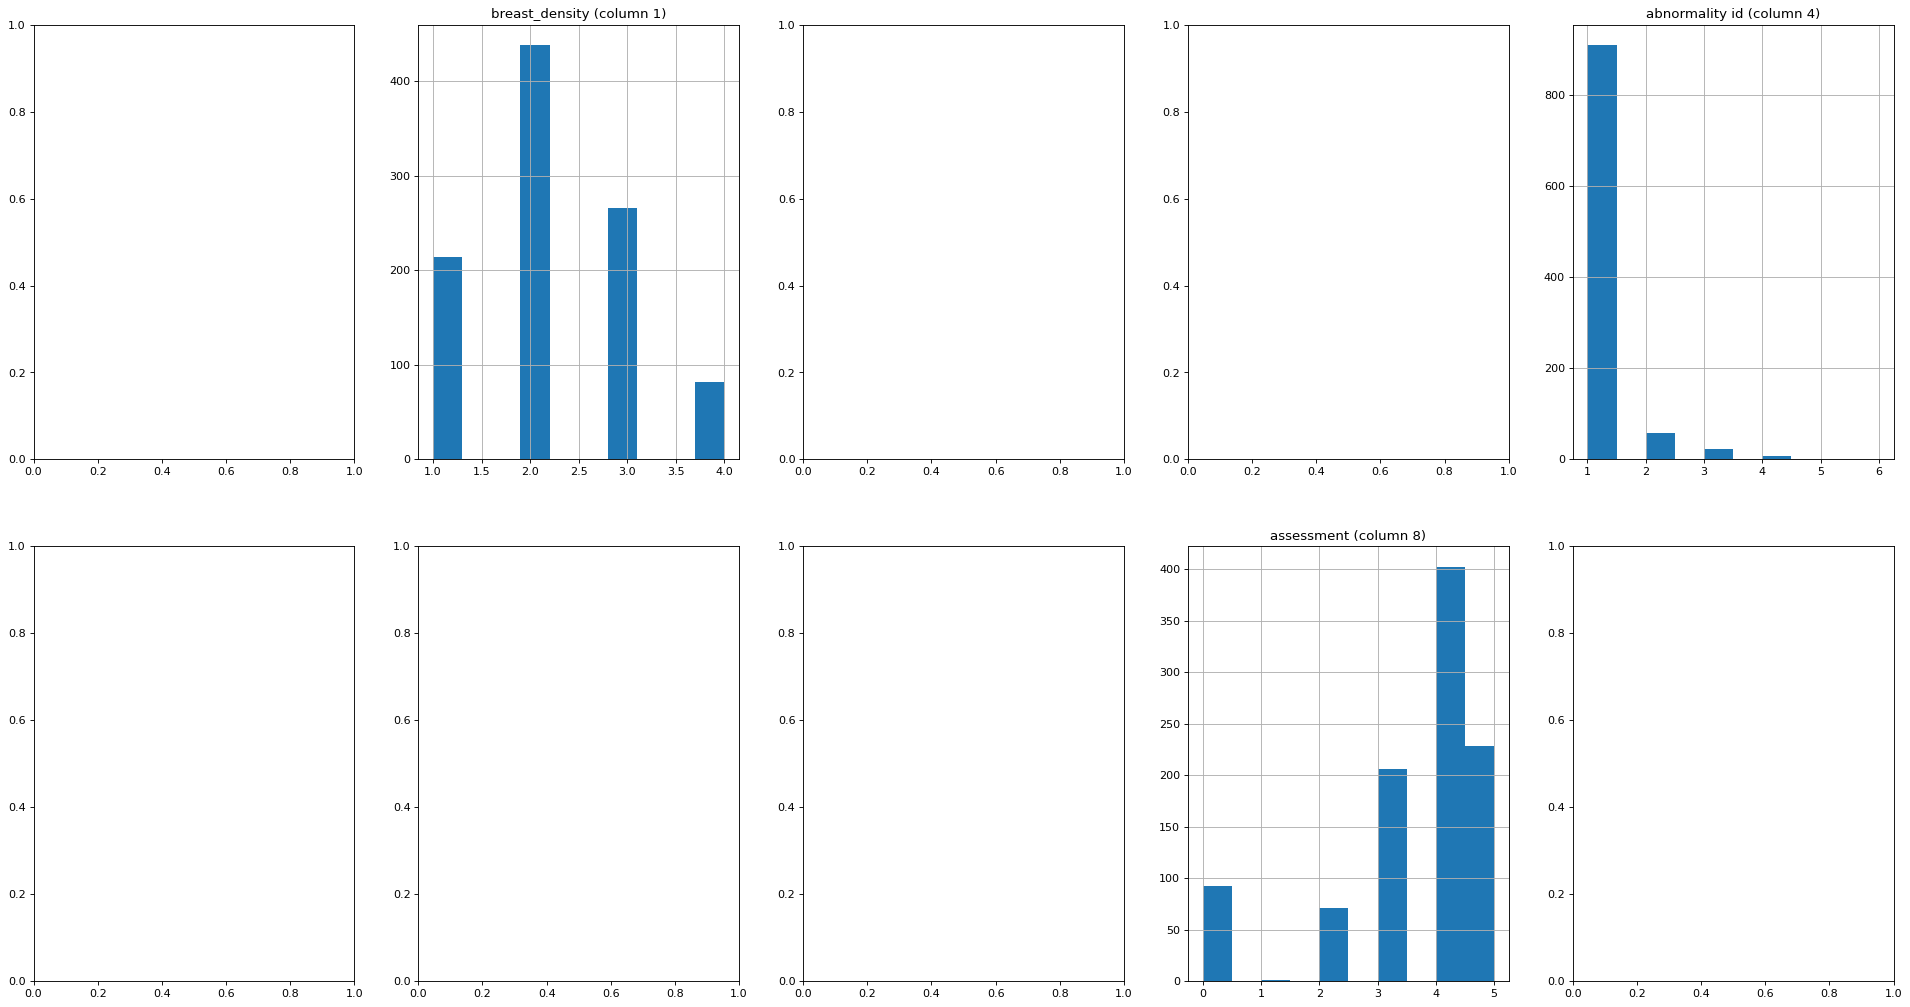

In [42]:
nRowsRead = 1000 
df3 = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv', delimiter=',', nrows = nRowsRead)
df3.dataframeName = 'mass_case_description_train_set.csv'
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')
plotCorrelationMatrix(df3, 8)
print("mass_case_description_train_csv")
plotPerColumnDistribution(df3, 10, 5)

# **Data Visualization**

In [43]:
#breast_img = glob.glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive = True)

#for imgname in breast_img[:3]:
 #   print(imgname)
    
base_directory = '../input/breast-histopathology-images/IDC_regular_ps50_idx5/'

breast_img = []

subdirectories = [f.path for f in os.scandir(base_directory) if f.is_dir()]

for subdirectory in subdirectories:
    for root, dirs, files in os.walk(subdirectory):
        for file in files:
            if file.endswith(".png"):
                file_path = os.path.join(root, file)
                breast_img.append(file_path)

for imgname in breast_img[:3]:
    print(imgname)


../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png
../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png


In [44]:
non_can_img = [] 
can_img = []
for img in breast_img:
    if img[-5] == '0' :
        non_can_img.append(img)
    
    elif img[-5] == '1' :
        can_img.append(img)
        
        
non_can_num = len(non_can_img)  # No cancer
can_num = len(can_img)   # Cancer 
        
total_img_num = non_can_num + can_num
        
print('Number of Images of no cancer: {}' .format(non_can_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(can_num))   # images of cancer 
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


In [45]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of Patients' : [198738,78786]})
bar = px.bar(data_frame=data_insight_1, x = 'state of cancer', y='Numbers of Patients', color='state of cancer')
bar.update_layout(title_text='Number of Patients with cancer (1) and patients with no cancer (0)', title_x=0.5)
bar.show()

In [46]:
r= pd.DataFrame(dicom_cleaned_data['SeriesDescription'].value_counts())
r= r.reset_index()
r = r.rename(columns={'SeriesDescription':'SeriesDescription_counts', 'index':'SeriesDescription'})
r

,SeriesDescription_counts,count
0,cropped images,3859
1,ROI mask images,3340
2,full mammogram images,3038


In [47]:
ba_1 = px.bar(data_frame=r, x = 'SeriesDescription_counts', y='count', color='SeriesDescription_counts')
ba_1.update_layout(title_text='Types of images used', title_x=0.5)
ba_1.show()

Bu grafikten en çok kullanılan cropped images olduğunu görmüş oluyoruz.

In [48]:
q= pd.DataFrame(dicom_cleaned_data['PatientOrientation'].value_counts())
q= q.reset_index()
q= q.rename(columns={'PatientOrientation':'PatientOrientation_counts', 'index':'PatientOrientation'})
q

,PatientOrientation_counts,count
0,MLO,5434
1,CC,4803


In [49]:
qfig =px.pie(data_frame=q, names= 'PatientOrientation_counts', values='count', color = 'PatientOrientation_counts')
qfig.update_layout(title_text='The percenyages of PatientOrientation ', title_x=0.5)
qfig.show()

In [50]:
z = pd.DataFrame(Data_cleaning_1['calc_type'].value_counts())
z = z.reset_index()
z= z.rename(columns={'calc_type':'calc_type_counts'})
z

,calc_type_counts,count
0,PLEOMORPHIC,664
1,AMORPHOUS,139
2,PUNCTATE,106
3,LUCENT_CENTER,93
4,VASCULAR,82
5,FINE_LINEAR_BRANCHING,77
6,COARSE,35
7,ROUND_AND_REGULAR-LUCENT_CENTER,33
8,PLEOMORPHIC-FINE_LINEAR_BRANCHING,28
9,ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE,24


In [51]:
import plotly.express as px

bar1 = px.bar(data_frame=z, x='calc_type_counts', y='count', color='calc_type_counts', 
             title='Calcification Types Counts', labels={'index': 'Calcification Type', 'calc_type_counts': 'Count'})

bar1.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# Data Modeling

In [52]:

# Assuming you have image file paths in a list
# image_paths = ["../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png", ...]

# Load images using OpenCV and store them in a list
# images = [cv2.imread(image_path) for image_path in image_paths]

# Convert the list of images to a NumPy array
# X = np.array(images)

# Convert X to a NumPy array with float data type
# X = X.astype('float32')

# Normalize the data (scale between 0 and 1)
# X /= 255.0

# Print the shape of X to verify it is a 4D array
# print('Shape of X:', X.shape)


In [53]:
from matplotlib.image import imread
import cv2

max_samples = 1000 
some_non_img = random.sample(non_can_img, min(len(non_can_img), max_samples)) 
some_can_img = random.sample(can_img, min(len(can_img), max_samples)) 

non_img_arr = []
can_img_arr = []

for img in some_non_img: 
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR) 
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR) 
    non_img_arr.append([n_img_size, 0])
    
for img in some_can_img: 
    
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])
    
breast_img_arr = non_img_arr + can_img_arr
random.shuffle(breast_img_arr) 

In [54]:
X = []
y = []

for feature, label in breast_img_arr: 
    X.append(feature)
    y.append(label)


X = np.array(X)
y = np.array(y)

In [55]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

rate = 0.5
num = int(X.shape[0] * rate)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (1600, 50, 50, 3)
X_test shape : (400, 50, 50, 3)
y_train shape : (1600, 2)
y_test shape : (400, 2)


In [56]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [57]:
import tensorflow as tf 
tf.random.set_seed(100)
model = tf.keras.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)),
tf.keras.layers.MaxPooling2D(strides = 2),
tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides = 2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
tf.keras.layers.MaxPooling2D((3, 3),strides =2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dense(2, activation = 'softmax')
]) 

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 128)         0

In [59]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25 , batch_size = 75)

Epoch 1/25
22/22 [==============================] - 10s 27ms/step - loss: 7.7429 - accuracy: 0.5256 - val_loss: 5.2794 - val_accuracy: 0.5500
Epoch 2/25
22/22 [==============================] - 0s 9ms/step - loss: 14.0988 - accuracy: 0.6181 - val_loss: 39.5765 - val_accuracy: 0.5475
Epoch 3/25
22/22 [==============================] - 0s 8ms/step - loss: 6.6402 - accuracy: 0.5569 - val_loss: 13.8827 - val_accuracy: 0.5000
Epoch 4/25
22/22 [==============================] - 0s 8ms/step - loss: 11.0401 - accuracy: 0.5506 - val_loss: 41.9079 - val_accuracy: 0.4650
Epoch 5/25
22/22 [==============================] - 0s 8ms/step - loss: 12.1029 - accuracy: 0.5612 - val_loss: 19.3252 - val_accuracy: 0.7325
Epoch 6/25
22/22 [==============================] - 0s 8ms/step - loss: 5.2295 - accuracy: 0.7362 - val_loss: 13.3863 - val_accuracy: 0.7350
Epoch 7/25
22/22 [==============================] - 0s 9ms/step - loss: 2.0672 - accuracy: 0.7481 - val_loss: 3.9875 - val_accuracy: 0.7900
Epoch 8/25

In [60]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 0s 9ms/step - loss: 1.2694 - accuracy: 0.5250


[1.2694021463394165, 0.5249999761581421]

Şimdi de modelin test verisi üzerindeki tahminlerini kullanarak bir karışıklık matrisi (confusion matrix) oluşturalım. Bu matrisi de ısı haritası şeklinde görselleştirelim.

13/13 [==============================] - 0s 2ms/step


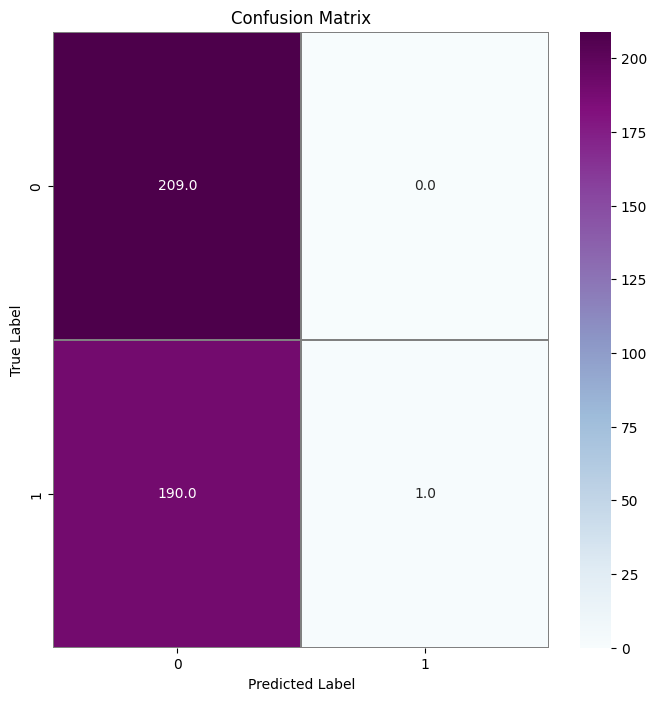

In [61]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

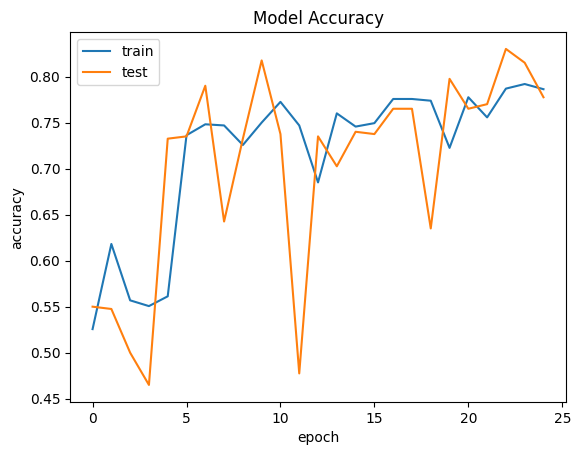

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

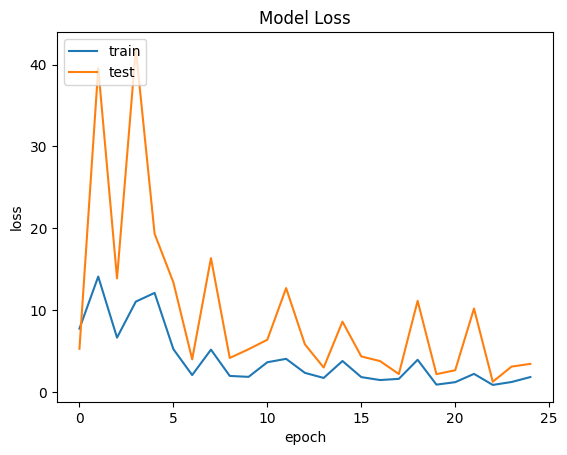

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
prediction = model.predict(X_test)
prediction 

13/13 [==============================] - 0s 2ms/step


array([[9.99941707e-01, 5.83199035e-05],
       [9.99999523e-01, 4.31621686e-07],
       [9.97699559e-01, 2.30044383e-03],
       [9.85867918e-01, 1.41320424e-02],
       [9.99131143e-01, 8.68851086e-04],
       [8.24154913e-01, 1.75845087e-01],
       [7.33767509e-01, 2.66232431e-01],
       [9.96964037e-01, 3.03594978e-03],
       [9.99755442e-01, 2.44605908e-04],
       [6.51138544e-01, 3.48861456e-01],
       [7.68827856e-01, 2.31172115e-01],
       [9.99958158e-01, 4.17898882e-05],
       [9.70030129e-01, 2.99698804e-02],
       [6.19039059e-01, 3.80961001e-01],
       [1.00000000e+00, 1.53705244e-08],
       [5.87570846e-01, 4.12429154e-01],
       [9.86400127e-01, 1.35999024e-02],
       [8.45648766e-01, 1.54351294e-01],
       [9.79089439e-01, 2.09105611e-02],
       [9.99993205e-01, 6.81539768e-06],
       [9.99627471e-01, 3.72531504e-04],
       [9.99209762e-01, 7.90199148e-04],
       [9.99875426e-01, 1.24604529e-04],
       [9.88975286e-01, 1.10247070e-02],
       [9.999669

Test verisi içinden belirli bir indeksteki görüntüyü bu fonksiyon aracılığıyla gösterelim.

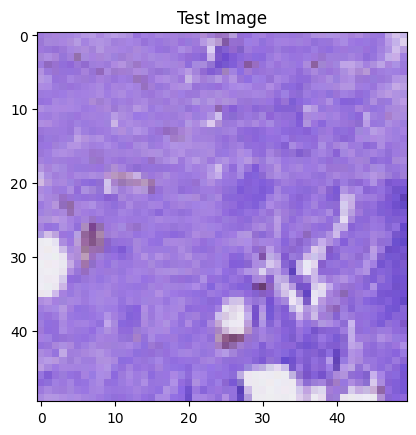

In [65]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])
    
index = 90
img_plot(X_test, index)

In [66]:
input = X_test[index:index+1]
pred = model.predict(input)[0].argmax()
label = y_test[index].argmax()
print('Predicted Value using  cnn model',pred)
print("True Value",label)

1/1 [==============================] - 0s 74ms/step
Predicted Value using  cnn model 0
True Value 0


1/1 [==============================] - 0s 20ms/step
Predicted Diagnosis: Non-Cancerous
Calcification Type: No Calcification
True Diagnosis: Non-Cancerous


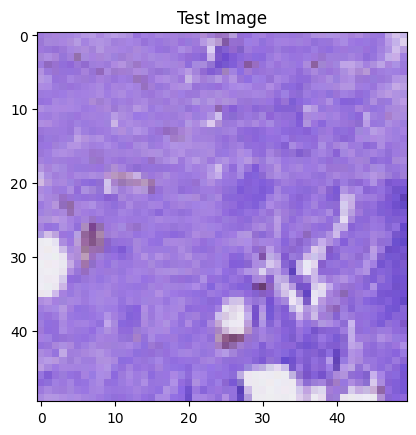

In [67]:
# Define a mapping of class indices to human-readable labels
class_labels = {
    0: 'Non-Cancerous',
    1: 'Cancerous',
}

# Define a mapping of calcification types
calcification_types = {
    0: 'No Calcification',
    1: 'PLEOMORPHIC',
    2: 'AMORPHOUS',
    3: 'PUNCTATE',
    4: 'LUCENT_CENTER',
    5: 'VASCULAR',
    6: 'FINE_LINEAR_BRANCHING',
    7: 'COARSE',
    8: 'ROUND_AND_REGULAR-LUCENT_CENTER',
    9: 'PLEOMORPHIC-FINE_LINEAR_BRANCHING',
    10: 'ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE',
    11: 'ROUND_AND_REGULAR-EGGSHELL',
    12: 'PUNCTATE-PLEOMORPHIC',
    13: 'DYSTROPHIC',
    14: 'LUCENT_CENTERED',
    15: 'ROUND_AND_REGULAR-LUCENT_CENTER-DYSTROPHIC',
    16: 'ROUND_AND_REGULAR',
    17: 'ROUND_AND_REGULAR-LUCENT_CENTERED',
    18: 'AMORPHOUS-PLEOMORPHIC',
    19: 'LARGE_RODLIKE-ROUND_AND_REGULAR',
    20: 'PUNCTATE-AMORPHOUS',
    21: 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTER',
    22: 'VASCULAR-COARSE-LUCENT_CENTERED',
    23: 'LUCENT_CENTER-PUNCTATE',
    24: 'ROUND_AND_REGULAR-PLEOMORPHIC',
    25: 'EGGSHELL',
    26: 'PUNCTATE-FINE_LINEAR_BRANCHING',
    27: 'VASCULAR-COARSE',
    28: 'ROUND_AND_REGULAR-PUNCTATE',
    29: 'SKIN-PUNCTATE-ROUND_AND_REGULAR',
    30: 'SKIN-PUNCTATE',
    31: 'COARSE-ROUND_AND_REGULAR-LUCENT_CENTERED',
    32: 'PUNCTATE-ROUND_AND_REGULAR',
    33: 'LARGE_RODLIKE',
    34: 'AMORPHOUS-ROUND_AND_REGULAR',
    35: 'PUNCTATE-LUCENT_CENTER',
    36: 'SKIN',
    37: 'VASCULAR-COARSE-LUCENT_CENTER-ROUND_AND_REGULA',
    38: 'COARSE-PLEOMORPHIC',
    39: 'ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS',
    40: 'COARSE-LUCENT_CENTER',
    41: 'MILK_OF_CALCIUM',
    42: 'COARSE-ROUND_AND_REGULAR',
    43: 'SKIN-COARSE-ROUND_AND_REGULAR',
    44: 'ROUND_AND_REGULAR-AMORPHOUS',
    45: 'PLEOMORPHIC-PLEOMORPHIC'
}

# Define a function for plotting an image from an array
def img_plot(arr, index=0):
    # Set the title for the plot
    plt.title('Test Image')
    
    # Display the image at the specified index in the array
    plt.imshow(arr[index])

# Set the index value to 90
index = 90

# Plot an image from the X_test array using the img_plot function
img_plot(X_test, index)

# Extract a single image from X_test based on the specified index
input = X_test[index:index+1]

# Make a prediction using the CNN model and get the class with the highest probability
predicted_class_index = model.predict(input)[0].argmax()

# Get the true label from the y_test array
true_class_index = y_test[index].argmax()

# Get the predicted and true labels
predicted_label = class_labels[predicted_class_index]
true_label = class_labels[true_class_index]

# Get the calcification type based on the predicted class index (modify as needed)
calcification_type = calcification_types[predicted_class_index]

# Print the prediction result with calcification type
print('Predicted Diagnosis:', predicted_label)
print('Calcification Type:', calcification_type)
print('True Diagnosis:', true_label)